In [39]:
import pandas as pd
import matplotlib.pyplot as plt

character_metadata_file = "character.metadata.tsv"
character_df = pd.read_csv(character_metadata_file, sep="\t", header=None)

column_names = ["wikipedia_id", "freebase_movie_id", "movie_release_date", "character_name", 
                "actor_date_of_birth", "actor_gender", "actor_height", "actor_ethnicity_id", 
                "actor_name", "actor_age_at_movie_release", "freebase_character_actor_map_id", 
                "freebase_character_id", "freebase_actor_id"]

character_df.columns = column_names

character_df.drop(columns=["freebase_movie_id", "actor_ethnicity_id", "freebase_character_actor_map_id", 
                            "freebase_character_id", "freebase_actor_id"], inplace=True)

character_df.fillna("", inplace=True)

character_df["movie_release_year"] = character_df["movie_release_date"].str[:4]

character_df = character_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

character_df["actor_age_at_movie_release"] = pd.to_numeric(character_df["actor_age_at_movie_release"], errors="coerce")
import numpy as np

character_df["actor_age_at_movie_release"] = character_df["actor_age_at_movie_release"].apply(lambda x: np.nan if x < 0 else x)

/tmp/ipykernel_93071/619484273.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  character_df.fillna("", inplace=True)
/tmp/ipykernel_93071/619484273.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  character_df = character_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


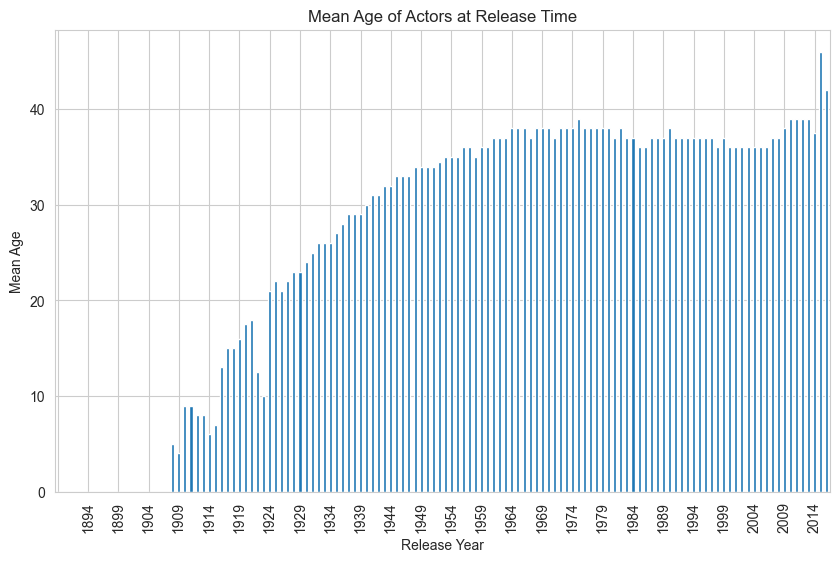

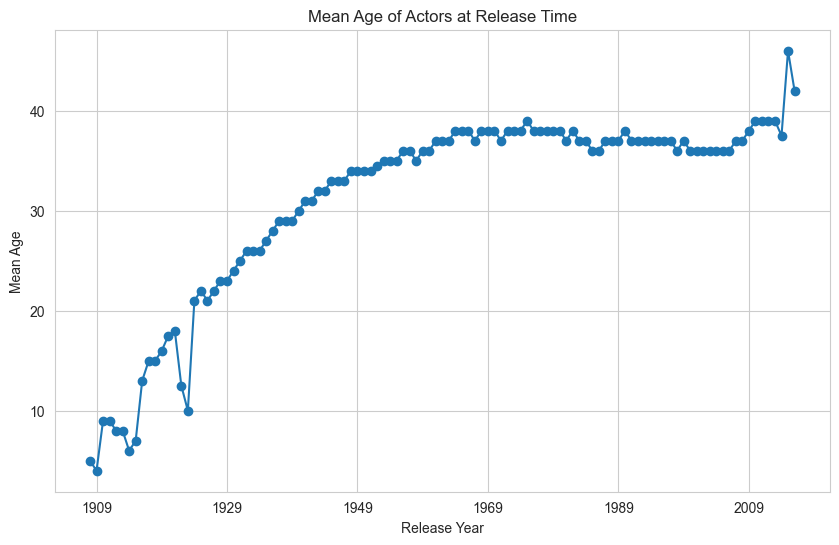

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.0, 4.0, 9.0, 9.0, 8.0, 8.0, 6.0, 7.0, 13.0, 15.0, 15.0, 16.0, 17.5, 18.0, 12.5, 10.0, 21.0, 22.0, 21.0, 22.0, 23.0, 23.0, 24.0, 25.0, 26.0, 26.0, 26.0, 27.0, 28.0, 29.0, 29.0, 29.0, 30.0, 31.0, 31.0, 32.0, 32.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 36.0, 36.0, 35.0, 36.0, 36.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 37.0, 38.0, 38.0, 38.0, 37.0, 38.0, 38.0, 38.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 38.0, 37.0, 37.0, 36.0, 36.0, 37.0, 37.0, 37.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 38.0, 39.0, 39.0, 39.0, 39.0, 37.5, 46.0, 42.0]


In [40]:
# Drop rows with NaN in 'movie_release_year' column
character_df = character_df.dropna(subset=['movie_release_year'])

# Recalculate mean_age_by_year
mean_age_by_year = character_df.groupby("movie_release_year")["actor_age_at_movie_release"].median()

import matplotlib.ticker as ticker

# Bar graph
plt.figure(figsize=(10, 6))
mean_age_by_year.plot(kind='bar')
plt.title("Mean Age of Actors at Release Time")
plt.xlabel("Release Year")
plt.ylabel("Mean Age")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set x-ticks every 5 years
plt.xticks(rotation=90)  # Rotate x-labels
plt.grid(True)
plt.show()

# Line plot
plt.figure(figsize=(10, 6))
mean_age_by_year.plot(marker='o', linestyle='-')
plt.title("Mean Age of Actors at Release Time")
plt.xlabel("Release Year")
plt.ylabel("Mean Age")
plt.grid(True)
plt.show()

# Convert mean age by year Series to list
mean_age_list = mean_age_by_year.tolist()
print(mean_age_list)



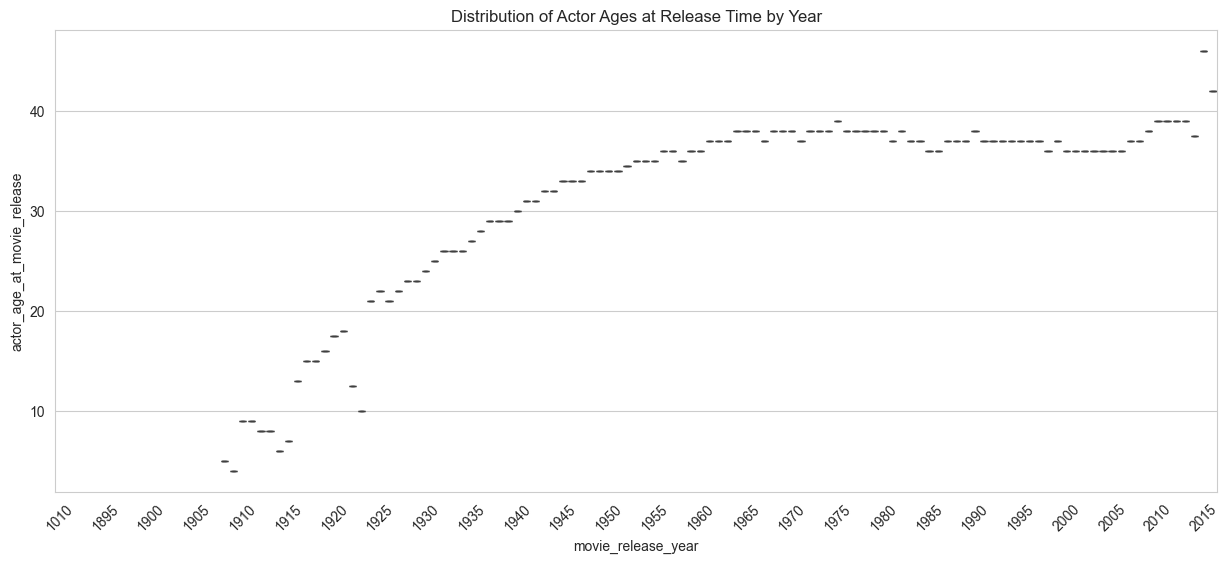

In [41]:
grouped_df = character_df.groupby("movie_release_year")["actor_age_at_movie_release"].apply(list).reset_index()

import seaborn as sns

# Convert 'movie_release_year' to int for better visualization
# Convert 'movie_release_year' to numeric, set errors as NaN
grouped_df['movie_release_year'] = pd.to_numeric(grouped_df['movie_release_year'], errors='coerce')

# Drop rows with NaN in 'movie_release_year' column
grouped_df = grouped_df.dropna(subset=['movie_release_year'])

# Convert 'movie_release_year' to int for better visualization
grouped_df['movie_release_year'] = grouped_df['movie_release_year'].astype(int)
# Create a new dataframe for seaborn
df_sns = grouped_df.explode('actor_age_at_movie_release')

# Convert 'actor_age_at_movie_release' to float
df_sns['actor_age_at_movie_release'] = df_sns['actor_age_at_movie_release'].astype(float)

plt.figure(figsize=(15, 6))


# Group by 'movie_release_year' and calculate median 'actor_age_at_movie_release'
df_grouped = df_sns.groupby('movie_release_year')['actor_age_at_movie_release'].median().reset_index()

# Plot
sns.boxplot(x='movie_release_year', y='actor_age_at_movie_release', data=df_grouped)
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set x-ticks every 5 years
plt.xticks(rotation= 45)
plt.title("Distribution of Actor Ages at Release Time by Year")
plt.show()

In [42]:
import pandas as pd
import ast

# Load the movie metadata file
movie_metadata_file = "movie.metadata.tsv"

# Read the file into a DataFrame
movie_df = pd.read_csv(movie_metadata_file, sep="\t", header=None)

# Define column names
column_names = ["wikipedia_id", "freebase_id", "movie_name", "release_date", 
                "box_office_revenue", "runtime", "languages", "countries", "genres"]

# Assign column names to the DataFrame
movie_df.columns = column_names

# Drop unnecessary columns
columns_to_drop = ["freebase_id", "box_office_revenue"]  # We drop freebase_id and box_office_revenue
movie_df.drop(columns=columns_to_drop, inplace=True)

# Handle missing values
movie_df.fillna("", inplace=True)

# Function to parse dictionary strings
def parse_dictionary_str(dict_str):
    try:
        return [value.strip()[0: ] for value in ast.literal_eval(dict_str).values()]
    except (SyntaxError, ValueError):
        return []

# Extract information from columns containing dictionaries (languages, countries, genres)
for column in ["languages", "countries", "genres"]:
    movie_df[column] = movie_df[column].apply(parse_dictionary_str)

# Convert release_date to datetime format
movie_df["release_date"] = pd.to_datetime(movie_df["release_date"], errors="coerce")

# Display the preprocessed movie metadata
print(movie_df.head())

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display the shape of the DataFrame
print(f"The dataset contains {movie_df.shape[0]} rows and {movie_df.shape[1]} columns.\n")

# Display the number of unique movies
print(f"There are {movie_df['movie_name'].nunique()} unique movies in the dataset.\n")

# Display the number of movies per language
print("Number of movies per language:")
print(movie_df['languages'].explode().value_counts().head(10), "\n")

# Display the number of movies per country
print("Number of movies per country:")
print(movie_df['countries'].explode().value_counts().head(10), "\n")

# Display the number of movies per genre
print("Number of movies per genre:")
print(movie_df['genres'].explode().value_counts().head(10), "\n")


/tmp/ipykernel_93071/2309029456.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movie_df.fillna("", inplace=True)


   wikipedia_id                                         movie_name  \
0        975900                                     Ghosts of Mars   
1       3196793  Getting Away with Murder: The JonBenét Ramsey ...   
2      28463795                                        Brun bitter   
3       9363483                                   White Of The Eye   
4        261236                                  A Woman in Flames   

  release_date runtime             languages                   countries  \
0   2001-08-24    98.0    [English Language]  [United States of America]   
1   2000-02-16    95.0    [English Language]  [United States of America]   
2          NaT    83.0  [Norwegian Language]                    [Norway]   
3          NaT   110.0    [English Language]            [United Kingdom]   
4          NaT   106.0     [German Language]                   [Germany]   

                                              genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery

   wikipedia_id      movie_name release_date runtime           languages  \
0        975900  Ghosts of Mars   2001-08-24    98.0  [English Language]   
1        975900  Ghosts of Mars   2001-08-24    98.0  [English Language]   
2        975900  Ghosts of Mars   2001-08-24    98.0  [English Language]   
3        975900  Ghosts of Mars   2001-08-24    98.0  [English Language]   
4        975900  Ghosts of Mars   2001-08-24    98.0  [English Language]   

                    countries  \
0  [United States of America]   
1  [United States of America]   
2  [United States of America]   
3  [United States of America]   
4  [United States of America]   

                                              genres movie_release_date  \
0  [Thriller, Science Fiction, Horror, Adventure,...         2001-08-24   
1  [Thriller, Science Fiction, Horror, Adventure,...         2001-08-24   
2  [Thriller, Science Fiction, Horror, Adventure,...         2001-08-24   
3  [Thriller, Science Fiction, Horror, Adven

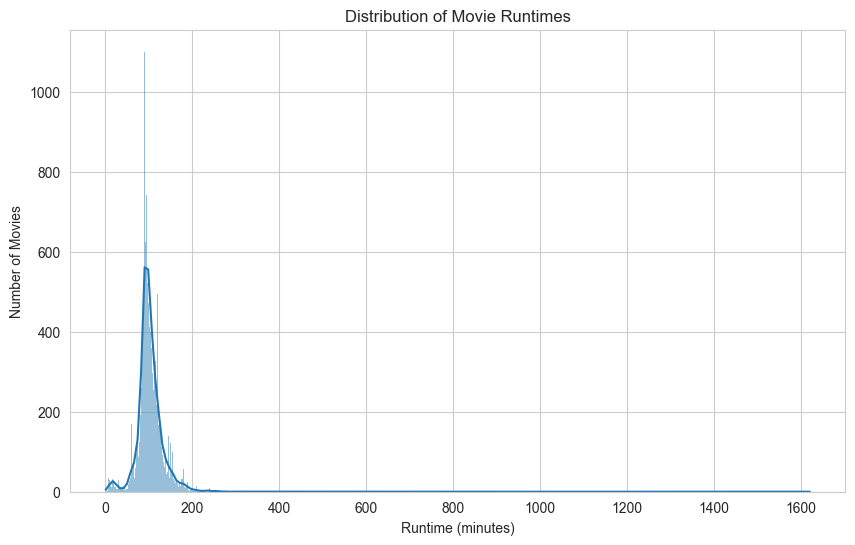

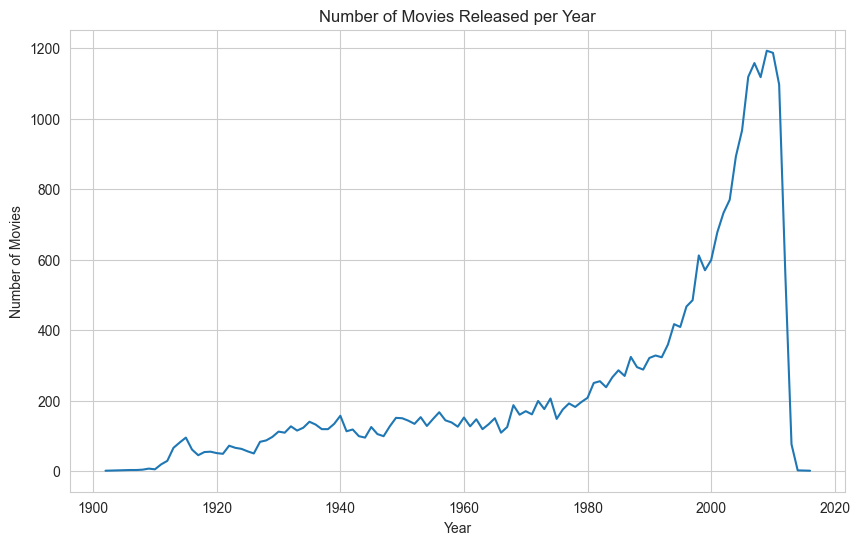

In [43]:
# Merge movie_df and character_df based on the common column "Wikipedia movie ID"
master_df = pd.merge(movie_df, character_df, on="wikipedia_id", how="inner")

# Display the merged dataframe
print(master_df.head())

# Drop rows with null 'runtime' or 'release_date'
master_df = master_df.dropna(subset=['runtime', 'release_date'])

# Sample a fraction of the data for faster plotting
sample_df = master_df.sample(frac=0.1, random_state=1)

# Display the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['runtime'], bins=50, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.show()

# Display the number of movies released per year
sample_df['release_year'] = sample_df['release_date'].dt.year
plt.figure(figsize=(10, 6))
sample_df['release_year'].value_counts().sort_index().plot()
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

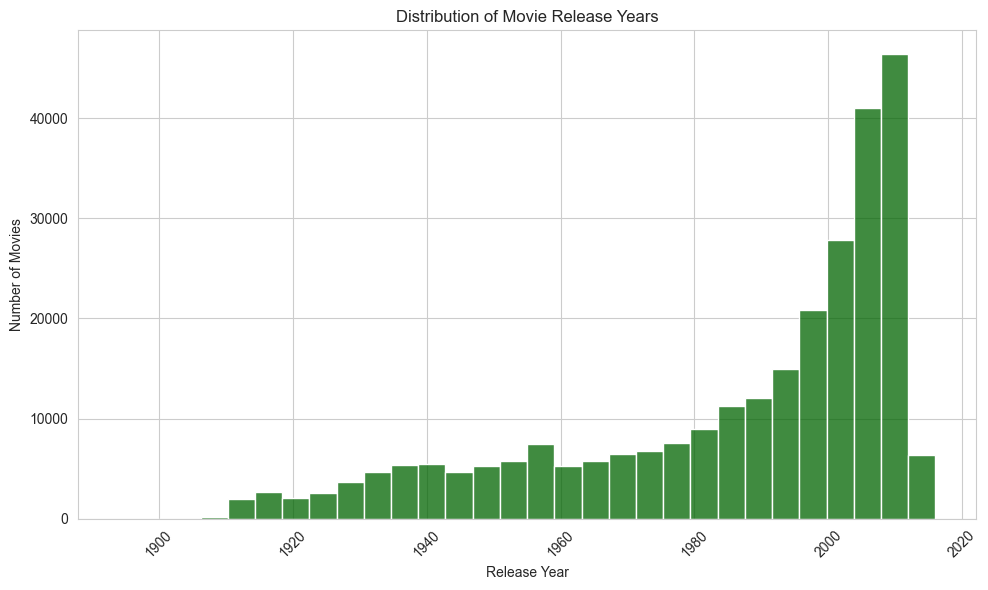

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set_style("whitegrid")

# Plot 1: Distribution of Movie Release Years
plt.figure(figsize=(10, 6))
sns.histplot(master_df["release_date"].dt.year, bins=30, kde=False, color="darkgreen")
plt.title("Distribution of Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_93071/1606943462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


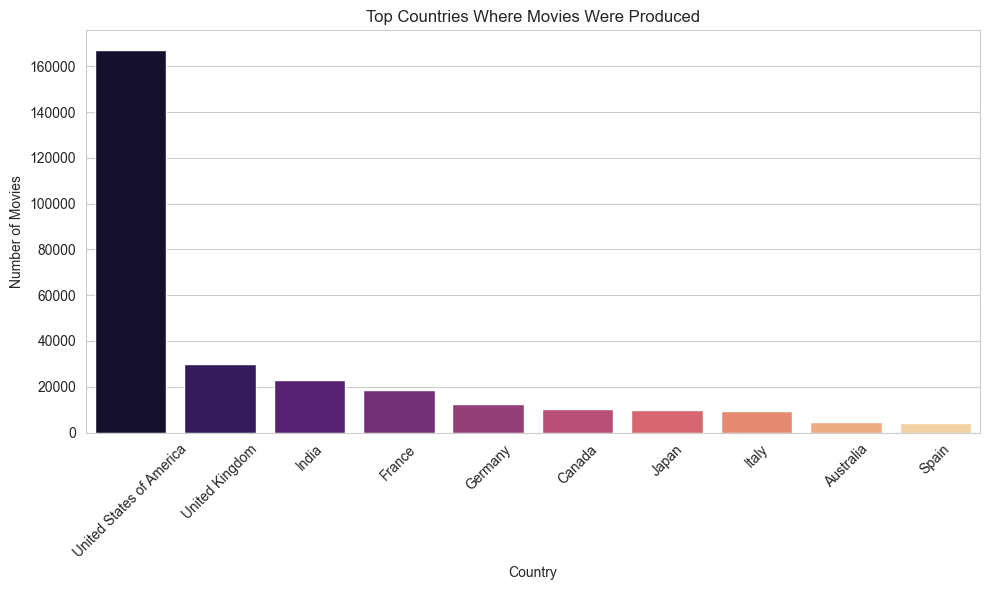

/tmp/ipykernel_93071/1606943462.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="magma")


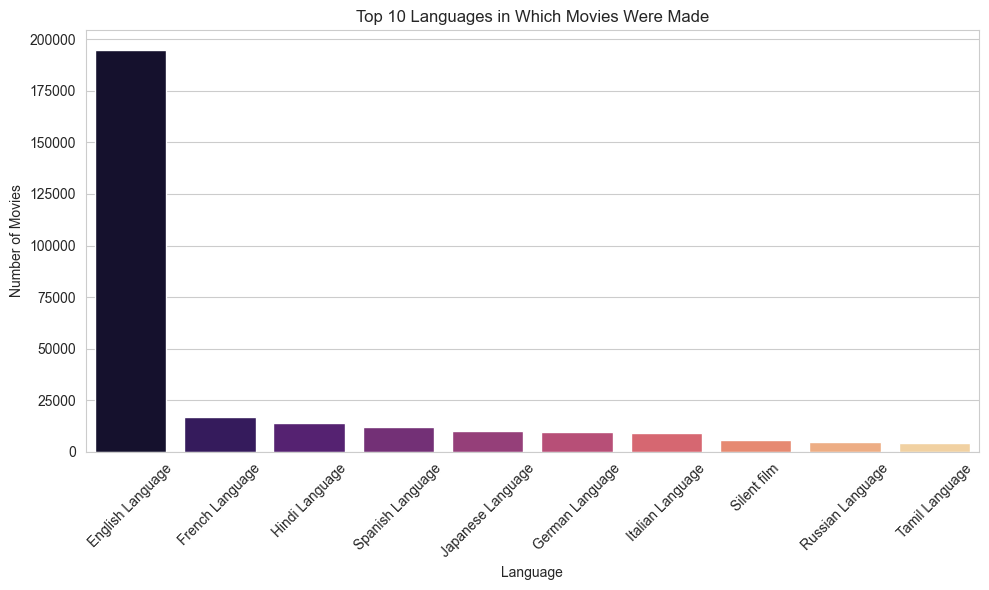

In [45]:
plt.figure(figsize=(10, 6))
top_countries = master_df["countries"].explode().value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.title("Top Countries Where Movies Were Produced")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_languages = master_df["languages"].explode().value_counts().head(10)
sns.barplot(x=top_languages.index, y=top_languages.values, palette="magma")
plt.title("Top 10 Languages in Which Movies Were Made")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




/tmp/ipykernel_93071/509333944.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.index, y=top_actors.values, palette="viridis")


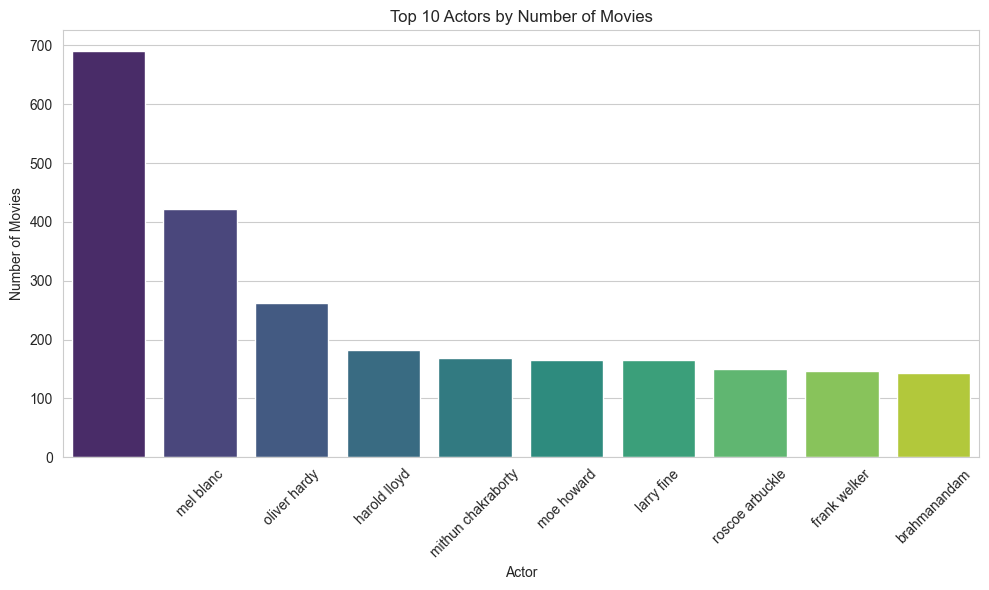

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1000x600 with 0 Axes>

In [46]:
# Plot 1: Top 10 Actors by Number of Movies
plt.figure(figsize=(10, 6))
top_actors = master_df["actor_name"].value_counts().head(10)
sns.barplot(x=top_actors.index, y=top_actors.values, palette="viridis")
plt.title("Top 10 Actors by Number of Movies")
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Top 10 Actors by Actor Height
plt.figure(figsize=(10, 6))
top_actors_height = master_df.groupby("actor_name")["actor_height"].mean().nlargest(10)
sns.barplot(x=top_actors_height.index, y=top_actors_height.values, palette="magma")
plt.title("Top 10 Actors by Actor Height")
plt.xlabel("Actor")
plt.ylabel("Height (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_93071/2264707759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.index, y=top_movies.values, palette="magma")


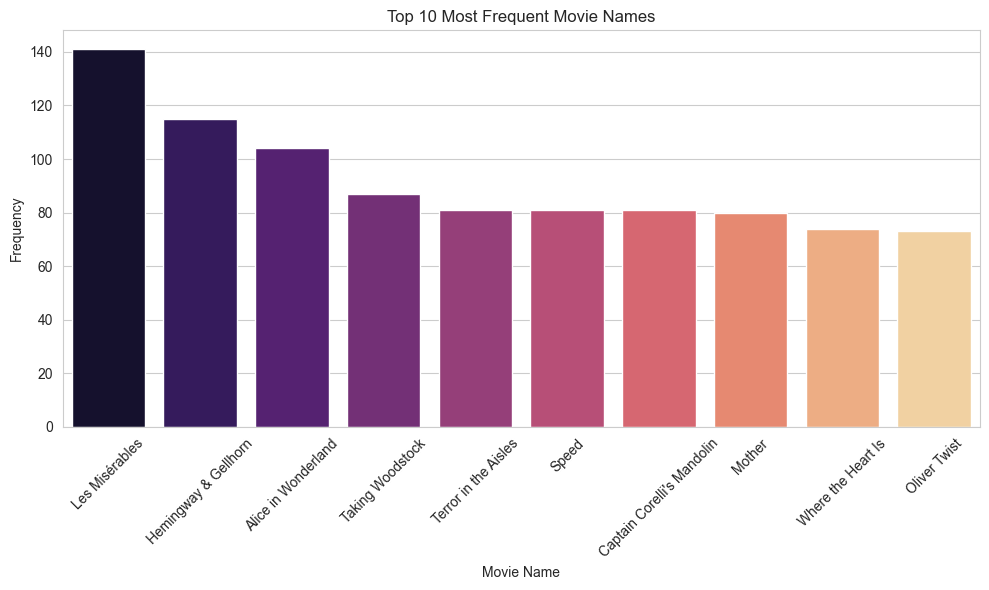

/tmp/ipykernel_93071/2264707759.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


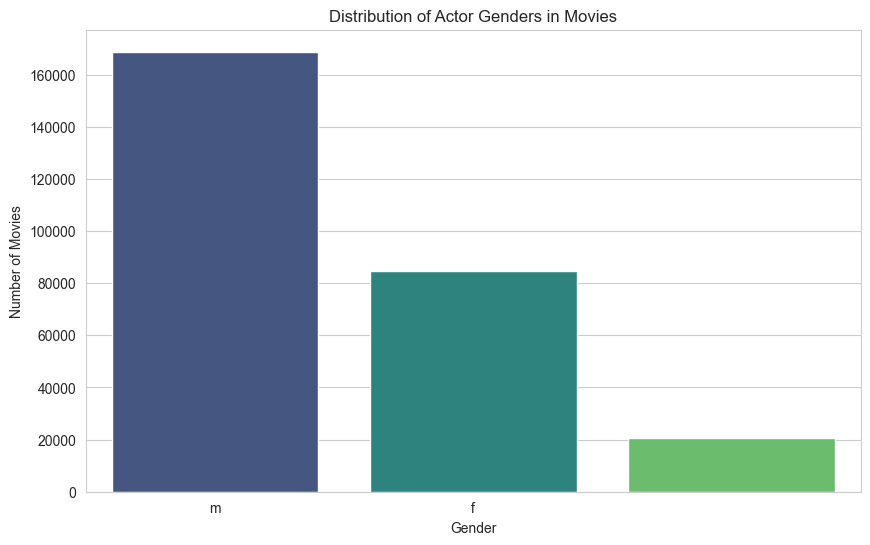

In [ ]:
# Plot 2: Top 10 Most Frequent Movie Names
plt.figure(figsize=(10, 6))
top_movies = master_df["movie_name"].value_counts().head(10)
sns.barplot(x=top_movies.index, y=top_movies.values, palette="magma")
plt.title("Top 10 Most Frequent Movie Names")
plt.xlabel("Movie Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Distribution of Actor Genders in Movies
plt.figure(figsize=(10, 6))
gender_counts = master_df["actor_gender"].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Distribution of Actor Genders in Movies")
plt.xlabel("Gender")
plt.ylabel("Number of Movies")
plt.show()

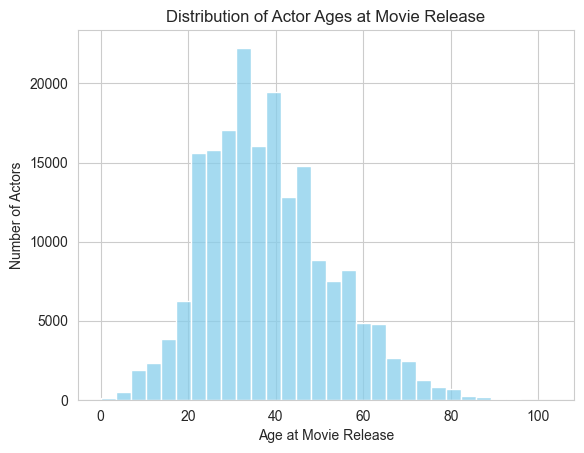

In [ ]:
sns.histplot(master_df["actor_age_at_movie_release"], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Actor Ages at Movie Release")
plt.xlabel("Age at Movie Release")
plt.ylabel("Number of Actors")
plt.show()


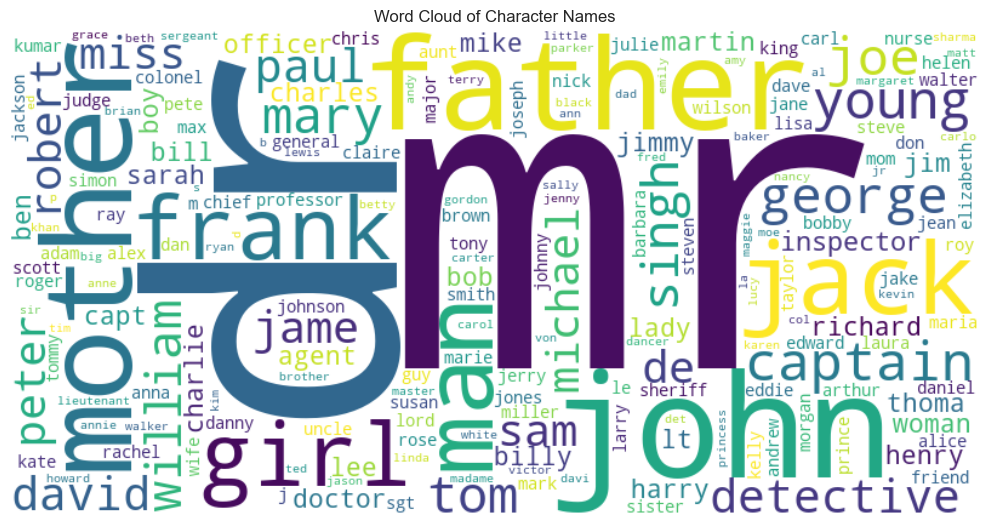

In [ ]:
# Plot 8: Character Names Analysis (Word Cloud)
from wordcloud import WordCloud

plt.figure(figsize=(10, 6))
character_names = " ".join(master_df["character_name"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(character_names)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Character Names")
plt.axis("off")
plt.tight_layout()
plt.show()


/tmp/ipykernel_93071/640926725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_unique_genres", y="actor_name", data=top_20_actors, palette="muted")


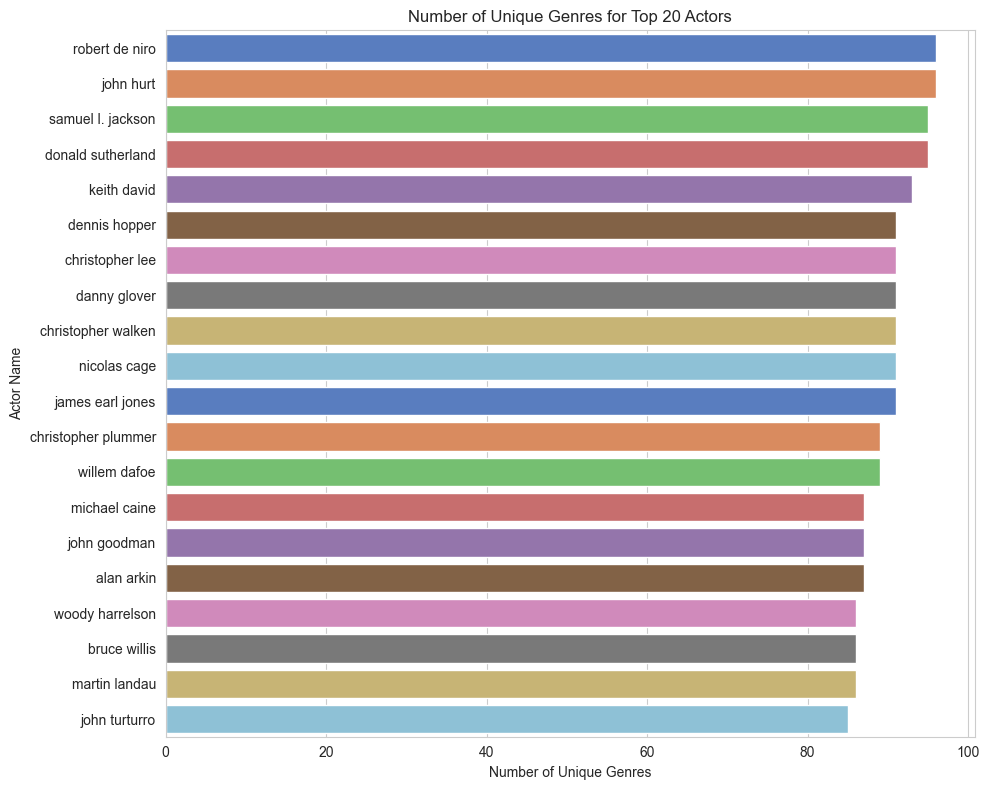

In [ ]:
# Count the number of unique genres each actor has worked in
actor_genre_counts = master_df.groupby("actor_name")["genres"].apply(lambda x: len(set(x.explode()))).reset_index(name="num_unique_genres")

# Sort actors by the number of unique genres they have worked in
actor_genre_counts = actor_genre_counts.sort_values(by="num_unique_genres", ascending=False)

#
actor_genre_counts = actor_genre_counts[actor_genre_counts["actor_name"] != ""]

# Select the top 20 actors (excluding the row with an empty actor name)
top_20_actors = actor_genre_counts.head(20)

# Plot the distribution of the number of unique genres for the top 20 actors
plt.figure(figsize=(10, 8))
sns.barplot(x="num_unique_genres", y="actor_name", data=top_20_actors, palette="muted")
plt.title("Number of Unique Genres for Top 20 Actors")
plt.xlabel("Number of Unique Genres")
plt.ylabel("Actor Name")
plt.tight_layout()
plt.show()


In [ ]:
def convert_date(date):
    try:
        return pd.to_datetime(date, unit='s')
    except ValueError:
        try:
            return pd.to_datetime(date, format='%Y-%m-%d', errors='raise')
        except ValueError:
            try:
                return pd.to_datetime(date, format='%Y-%m', errors='raise')
            except ValueError:
                try:
                    return pd.to_datetime(date, format='%Y', errors='raise')
                except ValueError:
                    return pd.to_datetime(date, errors='coerce')

master_df['actor_date_of_birth'] = master_df['actor_date_of_birth'].apply(convert_date)

# Drop rows with NaT in 'actor_date_of_birth'
master_df = master_df.dropna(subset=['actor_date_of_birth'])

